In [17]:
# RUN ONLY ONCE
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import sys
import numpy as np
import pandas as pd
import librosa as lr
import librosa.display as lrd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Audio
import os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#### Load BanglaSER Dataset

In [19]:
# dataset = '../Datasets/BanglaSER/'

# files = []
# emo = []

# def getEmotion(i):
#     if i == '01':
#         return 'happy'
#     elif i == '02':
#         return 'sad'
#     elif i == '03':
#         return 'angry'
#     elif i == '04':
#         return 'surprise'
#     elif i == '05':
#         return 'neutral'
#     else :
#         return 'error'


# for dirpath, dirnames, filenames in os.walk(dataset):
#     for filename in filenames:
#         files.append(os.path.join(dirpath, filename))
#         x = filename.split('-')[2]
#         emo.append(getEmotion(x))


# files
# emo

#### Load SUBESCO Dataset

In [2]:
dataset = '../Datasets/SUBESCO/'

files = []
emo = []

for dirpath, dirnames, filenames in os.walk(dataset):
    # print(dirnames, filenames)
    for filename in filenames:
        x = os.path.join(dirpath, filename)
        files.append(x)
        y = x.split('_')[-2].lower()
        emo.append(y)

In [3]:
files[:10]

['../Datasets/SUBESCO/F_01_OISHI_S_10_ANGRY_1.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_ANGRY_2.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_ANGRY_3.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_ANGRY_4.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_ANGRY_5.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_DISGUST_1.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_DISGUST_2.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_DISGUST_3.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_DISGUST_4.wav',
 '../Datasets/SUBESCO/F_01_OISHI_S_10_DISGUST_5.wav']

In [4]:
emo[:10]

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust']

#### Load TESS Dataset

In [23]:
# dataset = '/content/drive/MyDrive/Datasets/tess'

# files = []
# emo = []

# for dirpath, dirnames, filenames in os.walk(dataset):
#     # print(dirnames, filenames)
#     for filename in filenames:
#         x = os.path.join(dirpath, filename)
#         files.append(x)
#         y = x.split('_')[-1].split('.')[0].lower()
#         emo.append(y)

In [5]:
d = pd.DataFrame()
d['sound'] = files
d['emotion'] = emo

d.sample(10)

sound   emotion
3617     ../Datasets/SUBESCO/M_01_BASHIR_S_3_FEAR_3.wav      fear
4304  ../Datasets/SUBESCO/M_03_ILIAS_S_2_SURPRISE_5.wav  surprise
5344  ../Datasets/SUBESCO/M_06_SHUKANTO_S_2_NEUTRAL_...   neutral
5935   ../Datasets/SUBESCO/M_07_SIBLY_S_9_NEUTRAL_1.wav   neutral
1392    ../Datasets/SUBESCO/F_04_SWARNALI_S_9_SAD_3.wav       sad
2345     ../Datasets/SUBESCO/F_07_TITHI_S_7_ANGRY_1.wav     angry
1999      ../Datasets/SUBESCO/F_06_SIMI_S_7_ANGRY_5.wav     angry
767   ../Datasets/SUBESCO/F_03_SMITA_S_1_SURPRISE_3.wav  surprise
4116   ../Datasets/SUBESCO/M_02_NIPUN_S_7_NEUTRAL_2.wav   neutral
1688   ../Datasets/SUBESCO/F_05_MOUNI_S_8_DISGUST_4.wav   disgust

<AxesSubplot:xlabel='emotion', ylabel='count'>

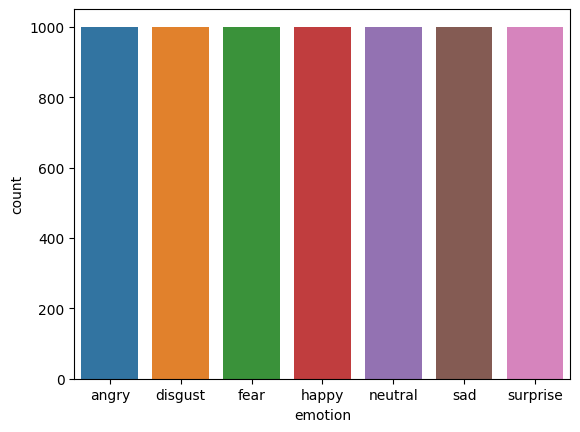

In [6]:
sb.countplot(x='emotion', data=d)

#### ERD

In [8]:
def waveplot(data, sr, title):
    plt.figure(figsize=(12, 4))
    plt.title(title)
    lrd.waveshow(data, sr=sr)
    plt.show()

def spectograph(data, sr, title):
    x = lr.stft(data)
    xdb = lr.amplitude_to_db(abs(x))
    plt.figure(figsize=(12, 4))
    plt.title(title)
    lrd.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def getPath(EType):
    return np.array(d['sound'][d['emotion'] == EType])[0]

def getInfo(EType):
    path = getPath(EType)
    data, sr = lr.load(path)
    waveplot(data, sr, EType)
    spectograph(data, sr, EType)


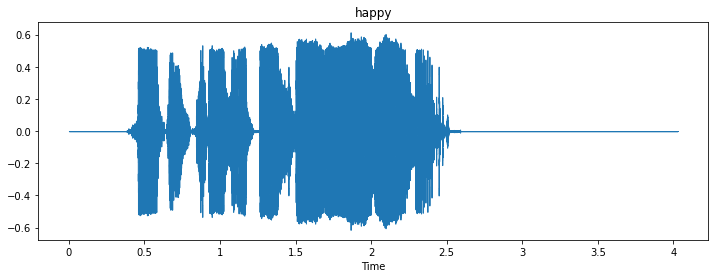

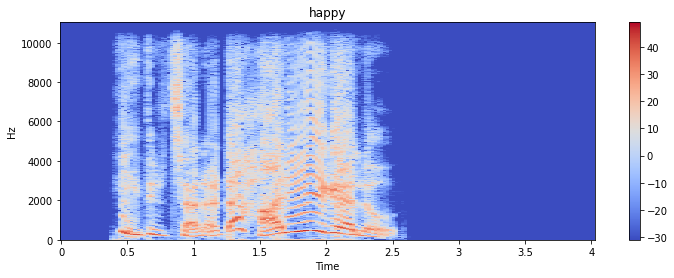

In [27]:
EType = 'happy'
getInfo(EType)
Audio(getPath(EType))

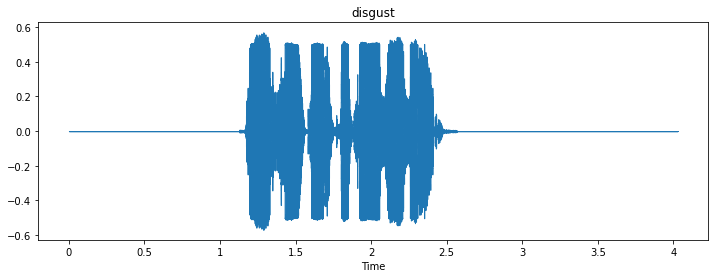

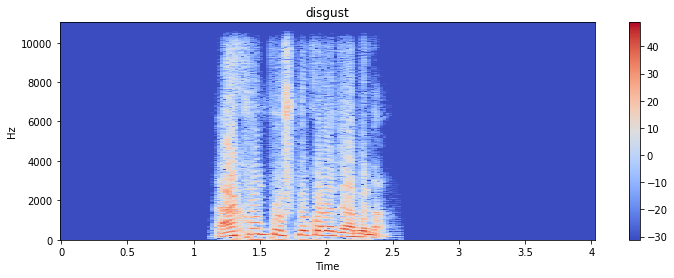

In [28]:
EType = 'disgust'
getInfo(EType)
Audio(getPath(EType))

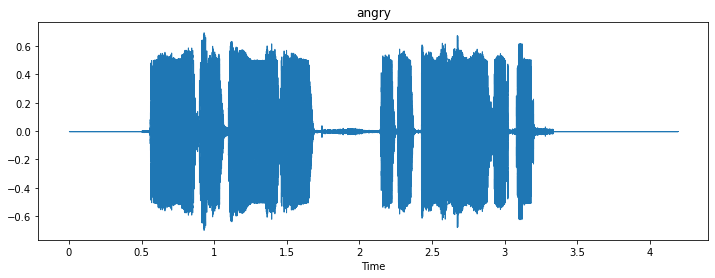

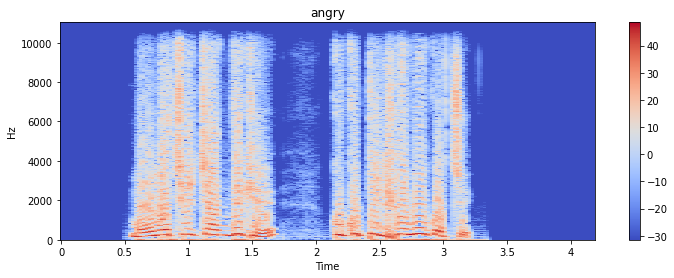

In [29]:
EType = 'angry'
getInfo(EType)
Audio(getPath(EType))

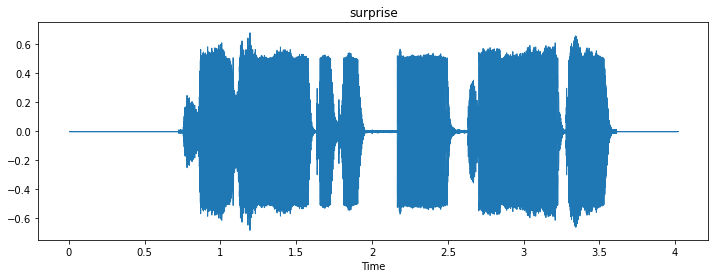

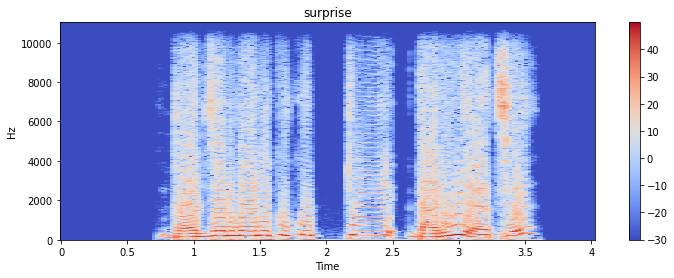

In [30]:
EType = 'surprise'
getInfo(EType)
Audio(getPath(EType))

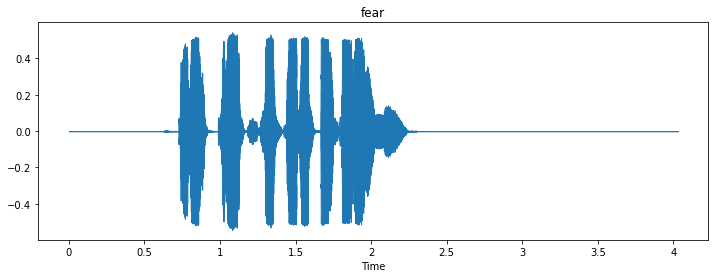

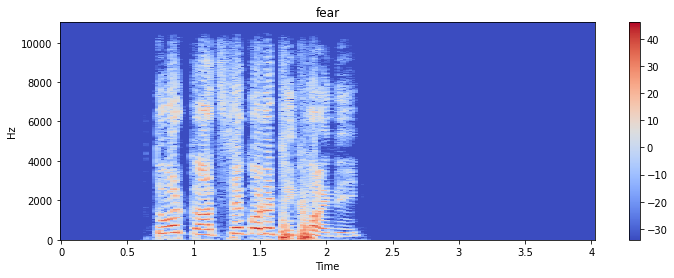

In [31]:
EType = 'fear'
getInfo(EType)
Audio(getPath(EType))

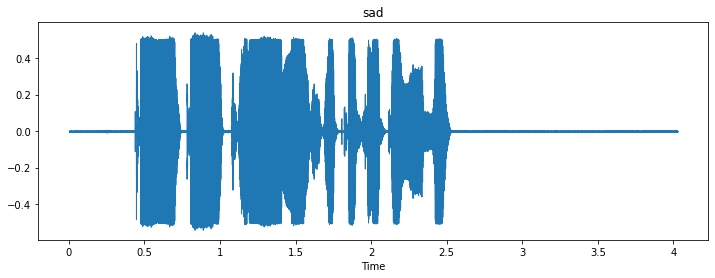

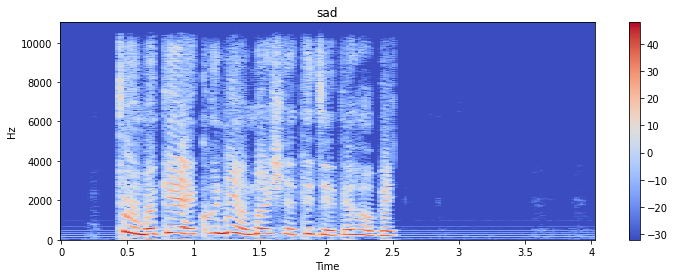

In [32]:
EType = 'sad'
getInfo(EType)
Audio(getPath(EType))

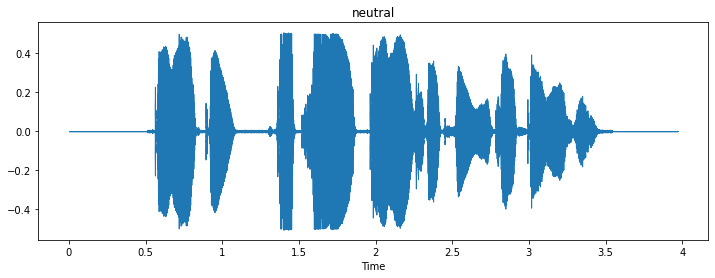

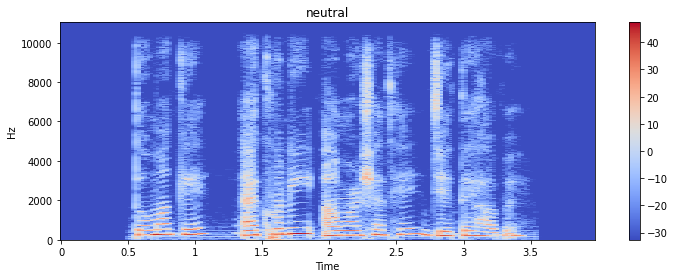

In [33]:
EType = 'neutral'
getInfo(EType)
Audio(getPath(EType))

# Data Augmentation

In [7]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return lr.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return lr.effects.pitch_shift(data, sampling_rate, pitch_factor)

## Data Augmentation Exhibition

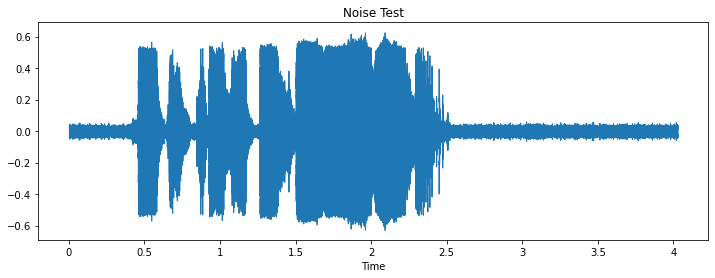

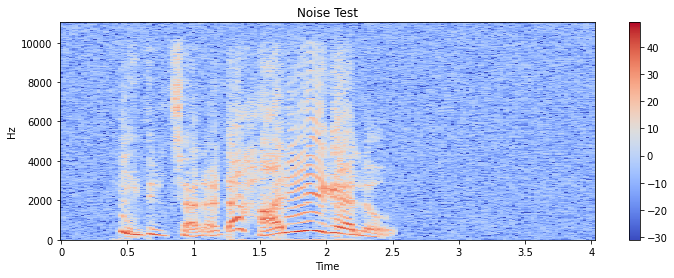

In [35]:
path = getPath('happy')
data, sr = lr.load(path)
x = noise(data)
waveplot(x, sr, 'Noise Test')
spectograph(x, sr, 'Noise Test')
Audio(x, rate=sr)

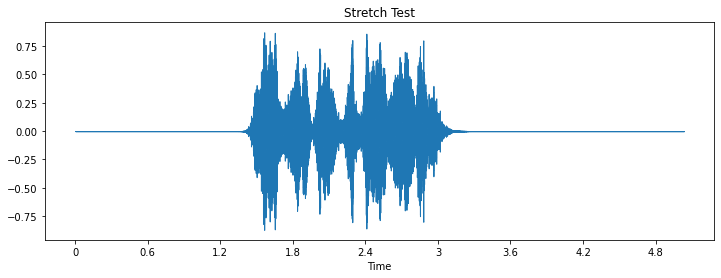

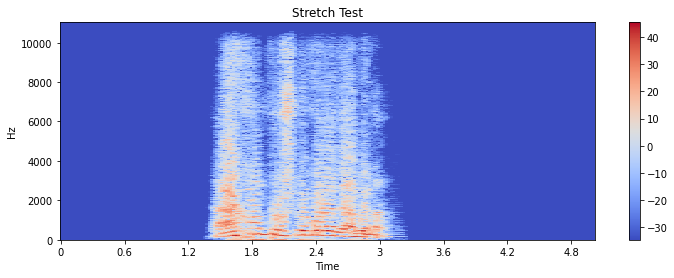

In [36]:
path = getPath('disgust')
data, sr = lr.load(path)
x = stretch(data)
waveplot(x, sr, 'Stretch Test')
spectograph(x, sr, 'Stretch Test')
Audio(x, rate=sr)

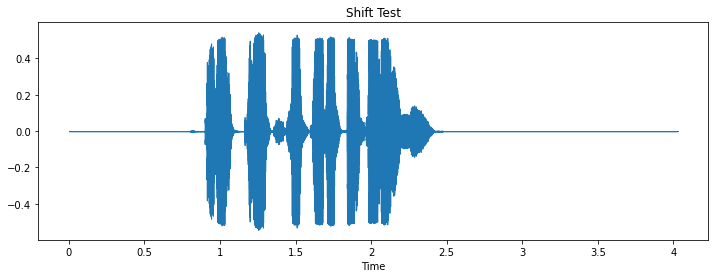

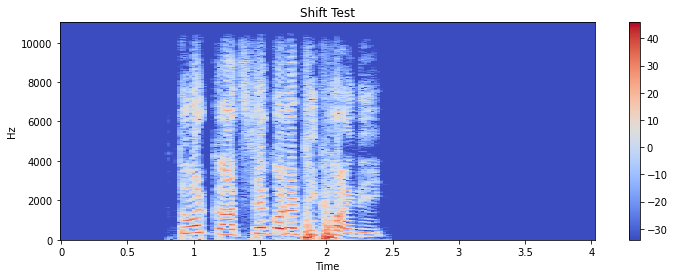

In [37]:
path = getPath('fear')
data, sr = lr.load(path)
x = shift(data)
waveplot(x, sr, 'Shift Test')
spectograph(x, sr, 'Shift Test')
Audio(x, rate=sr)

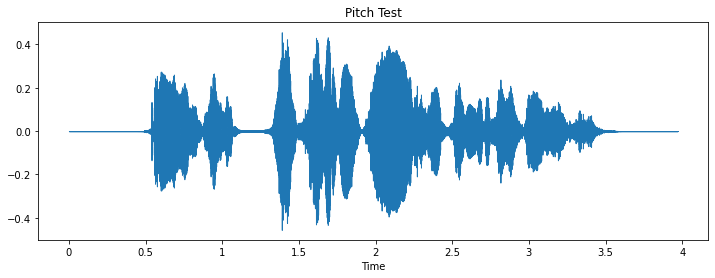

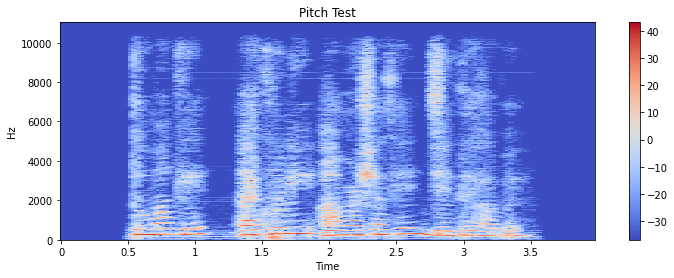

In [38]:
path = getPath('neutral')
data, sr = lr.load(path)
x = pitch(data, sr)
waveplot(x, sr, 'Pitch Test')
spectograph(x, sr, 'Pitch Test')
Audio(x, rate=sr)

In [39]:
## Shuffling
# d = d.sample(frac=1).reset_index(drop=True)
# d.head()

# Feature Extraction

In [9]:
from tqdm import tqdm

In [52]:
def get_features(path):
    data, sample_rate = lr.load(path) # Could have downsampled to 8000 Hz
    return extract_features(data, sample_rate)

def extract_features(data, sample_rate):

    result = np.array([])

    """
        Features
    """

    # ZCR
    # zcr = np.mean(lr.feature.zero_crossing_rate(y=data).T, axis=0)
    # result=np.hstack((result, zcr)) 

    # Chroma_stft
    stft = np.abs(lr.stft(data))
    chroma_stft = np.mean(lr.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(lr.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    # rms = np.mean(lr.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(lr.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def augment_data(df):

    X_features = []
    y = []

    for _, row in tqdm(df.iterrows()):
        data, sample_rate = lr.load(row['sound']) # Could havae downsampled to 8000 Hz

        # data with noise
        noise_data = noise(data)
        res2 = extract_features(noise_data, sample_rate)
        X_features.append(res2)
        y.append(row['emotion'])


        # data with stretching and pitching
        new_data = stretch(data)
        data_stretch_pitch = pitch(new_data, sample_rate)
        res3 = extract_features(data_stretch_pitch, sample_rate)
        X_features.append(res3)
        y.append(row['emotion'])
    
    X_features = pd.DataFrame(X_features)    
    y = pd.DataFrame(y)

    df_ft_aug = pd.concat([X_features, y], axis=1)
    df_ft_aug = df_ft_aug.set_axis([*df_ft_aug.columns[:-1], 'emotion'], axis=1, inplace=False) # Renames last column

    return df_ft_aug

In [47]:
def get_feature_dataframe(df: pd.DataFrame):

    X_features = []
    y = []

    for _, row in tqdm(df.iterrows()):
        res = get_features(row['sound'])
        X_features.append(res)
        y.append(row['emotion'])
    
    
    X_features = pd.DataFrame(X_features)    
    y = pd.DataFrame(y)    

    df_ft = pd.concat([X_features, y], axis=1)

    df_ft = df_ft.set_axis([*df_ft.columns[:-1], 'emotion'], axis=1, inplace=False) # Renames last column


    return df_ft

# Input split

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
encoder = OneHotEncoder()

In [18]:
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5
ratio_val = 0.25
ratio_test = 0.25

# Produces test split.
remaining, test = train_test_split(
    d, test_size=ratio_test, stratify=d['emotion'])

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
train, val = train_test_split(
    remaining, test_size=ratio_val_adjusted, stratify=remaining['emotion'])

train.shape, val.shape, test.shape

((3500, 2), (1750, 2), (1750, 2))

In [19]:
df_train = get_feature_dataframe(train)
df_val = get_feature_dataframe(val)
df_test = get_feature_dataframe(test)

3500it [10:03,  5.80it/s]
1750it [05:07,  5.69it/s]
1750it [05:09,  5.65it/s]


In [20]:
df_train.shape, df_val.shape, df_test.shape

((3500, 181), (1750, 181), (1750, 181))

In [22]:
df_train.head()

0         1         2         3         4         5         6  \
0  0.651344  0.687268  0.648077  0.608469  0.522142  0.483409  0.508850   
1  0.629149  0.692901  0.725080  0.625728  0.530290  0.521455  0.529710   
2  0.733871  0.753486  0.748366  0.699612  0.575290  0.528332  0.538583   
3  0.463828  0.505180  0.583872  0.575932  0.534391  0.531740  0.496637   
4  0.650282  0.650416  0.652269  0.679380  0.658476  0.652877  0.575128   

          7         8         9  ...       171       172       173       174  \
0  0.530177  0.579904  0.603189  ...  0.008765  0.010615  0.008246  0.007646   
1  0.546499  0.525825  0.517000  ...  0.017725  0.012401  0.014604  0.011857   
2  0.539285  0.568653  0.651994  ...  0.001366  0.001437  0.002134  0.001625   
3  0.433701  0.415595  0.492229  ...  0.003350  0.004235  0.003893  0.004849   
4  0.477515  0.496774  0.534881  ...  0.008017  0.008554  0.008313  0.009356   

        175       176       177       178           179  emotion  
0  0.006121  0.003375  0.000924  0.000072  1.093913e-06      sad  
1  0.009353  0.005625  0.002148  0.000152  3.053362e-06      sad  
2  0.002324  0.001682  0.000285  0.000029  4.783022e-07  disgust  
3  0.004947  0.003067  0.001056  0.000124  1.541135e-06      sad  
4  0.004187  0.002031  0.000491  0.000050  7.866121e-07      sad  

[5 rows x 181 columns]

In [23]:
df_val.head()

0         1         2         3         4         5         6  \
0  0.678394  0.640029  0.643214  0.600160  0.558590  0.564189  0.548703   
1  0.688707  0.730239  0.740747  0.637528  0.534250  0.530908  0.533794   
2  0.567925  0.642209  0.680812  0.632750  0.515367  0.486132  0.481184   
3  0.623865  0.637000  0.729330  0.659775  0.444316  0.377230  0.408570   
4  0.744561  0.683489  0.695461  0.628874  0.561377  0.510821  0.596260   

          7         8         9  ...       171       172       173       174  \
0  0.541931  0.566579  0.587058  ...  0.094731  0.124682  0.092021  0.118052   
1  0.578555  0.624323  0.678705  ...  0.010978  0.012513  0.014435  0.006892   
2  0.524634  0.540545  0.520711  ...  0.197797  0.234232  0.277428  0.318776   
3  0.439716  0.480568  0.532587  ...  0.006958  0.017748  0.014642  0.011841   
4  0.636413  0.628751  0.623279  ...  0.002599  0.004660  0.006120  0.006752   

        175       176       177       178       179   emotion  
0  0.101993  0.045252  0.015047  0.001347  0.000011      fear  
1  0.006324  0.003019  0.000842  0.000076  0.000001  surprise  
2  0.235691  0.103604  0.023267  0.001178  0.000018   disgust  
3  0.010874  0.005750  0.001481  0.000113  0.000003   neutral  
4  0.005808  0.002928  0.000783  0.000081  0.000002       sad  

[5 rows x 181 columns]

In [24]:
df_test.head()

0         1         2         3         4         5         6  \
0  0.680201  0.709291  0.725390  0.649324  0.486005  0.477176  0.549336   
1  0.593642  0.632660  0.642252  0.560215  0.463207  0.438562  0.477724   
2  0.734701  0.748567  0.785367  0.747609  0.595425  0.543146  0.576324   
3  0.654197  0.693426  0.680064  0.574004  0.450388  0.424326  0.480177   
4  0.667058  0.691677  0.688976  0.615729  0.575526  0.580955  0.566594   

          7         8         9  ...       171       172       173       174  \
0  0.558309  0.582341  0.601440  ...  0.000480  0.000764  0.001081  0.001301   
1  0.530258  0.618238  0.695772  ...  0.088813  0.077715  0.074565  0.074602   
2  0.604574  0.643836  0.674213  ...  0.026603  0.027429  0.039214  0.034435   
3  0.541191  0.590519  0.610058  ...  0.048919  0.064701  0.056826  0.059379   
4  0.611060  0.620405  0.653116  ...  0.177699  0.185266  0.159428  0.154917   

        175       176       177       178           179   emotion  
0  0.001918  0.001238  0.000343  0.000023  1.340742e-07       sad  
1  0.058980  0.052503  0.007230  0.000491  6.374589e-06  surprise  
2  0.033408  0.023110  0.008595  0.000799  1.057428e-05   disgust  
3  0.054230  0.034397  0.007949  0.000708  1.137945e-05     happy  
4  0.140283  0.067166  0.019867  0.001697  2.409572e-05     angry  

[5 rows x 181 columns]

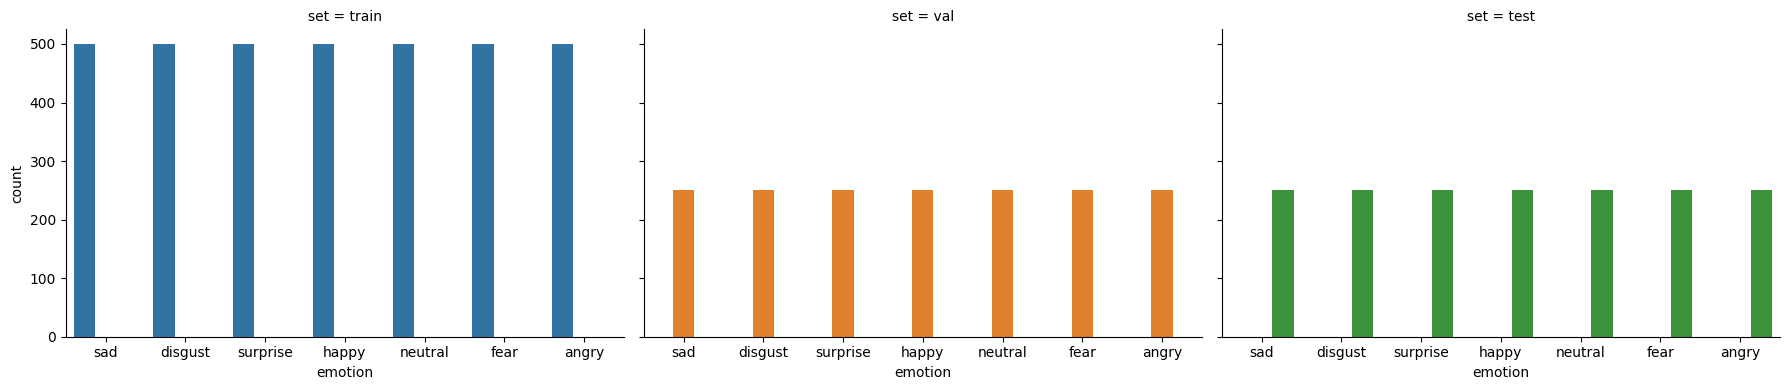

In [45]:
df_plot = pd.DataFrame(columns=['set', 'emotion'])

x = pd.DataFrame(df_train.shape[0] * ['train'])
y = pd.DataFrame(df_val.shape[0] * ['val'])
z = pd.DataFrame(df_test.shape[0] * ['test'])

df_plot['set'] = pd.concat([x ,y, z], axis=0, ignore_index=True)
df_plot['emotion'] = pd.concat([df_train['emotion'], df_val['emotion'], df_test['emotion']], axis=0, ignore_index=True)

g = sb.catplot(x='emotion', col='set', data=df_plot, kind='count', hue='set', height=4, aspect=1.5)

g.set_title('Number of samples per set')

## Augmenting Training Data

In [53]:
train_aug = augment_data(train)

3500it [31:04,  1.88it/s]


In [58]:
train_aug.head()

0         1         2         3         4         5         6  \
0  0.665681  0.674403  0.666991  0.701911  0.725341  0.616276  0.602454   
1  0.661184  0.637418  0.662963  0.605596  0.527162  0.536024  0.484870   
2  0.632160  0.643692  0.694409  0.728446  0.746748  0.702840  0.643611   
3  0.611227  0.609955  0.658183  0.673718  0.578478  0.540850  0.554102   
4  0.770572  0.779292  0.766973  0.773947  0.788011  0.704758  0.641978   

          7         8         9  ...       171       172       173       174  \
0  0.601068  0.631169  0.647167  ...  0.009955  0.011801  0.009377  0.008843   
1  0.475216  0.500005  0.545232  ...  0.002375  0.001885  0.002003  0.001901   
2  0.641236  0.633799  0.584636  ...  0.019273  0.013927  0.015875  0.012912   
3  0.556940  0.591808  0.591490  ...  0.003958  0.004173  0.003603  0.002941   
4  0.627642  0.653520  0.724688  ...  0.016955  0.017322  0.017613  0.017409   

        175       176       177       178           179  emotion  
0  0.007453  0.004658  0.002172  0.001339  1.213863e-03      sad  
1  0.001619  0.000869  0.000234  0.000012  6.278920e-08      sad  
2  0.010677  0.007048  0.003603  0.001599  1.402167e-03      sad  
3  0.002881  0.001222  0.000304  0.000020  1.867877e-07      sad  
4  0.018147  0.017781  0.016624  0.015974  1.593732e-02  disgust  

[5 rows x 181 columns]

In [57]:
train_aug = train_aug.set_axis([*train_aug.columns[:-1], 'emotion'], axis=1, inplace=False) # Renames last column

In [59]:
df_train = pd.concat([df_train, train_aug], axis=0, ignore_index=True)

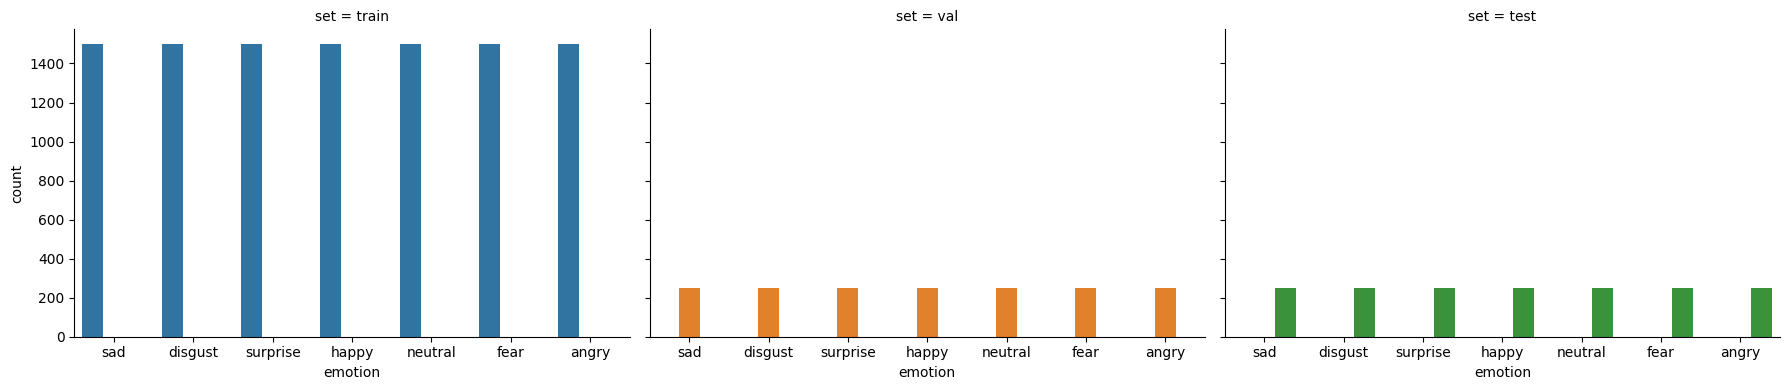

In [61]:
df_plot = pd.DataFrame(columns=['set', 'emotion'])

x = pd.DataFrame(df_train.shape[0] * ['train'])
y = pd.DataFrame(df_val.shape[0] * ['val'])
z = pd.DataFrame(df_test.shape[0] * ['test'])

df_plot['set'] = pd.concat([x ,y, z], axis=0, ignore_index=True)
df_plot['emotion'] = pd.concat([df_train['emotion'], df_val['emotion'], df_test['emotion']], axis=0, ignore_index=True)

g = sb.catplot(x='emotion', col='set', data=df_plot, kind='count', hue='set', height=4, aspect=1.5)

In [63]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [64]:
df_train

0         1         2         3         4         5         6  \
0      0.588590  0.612404  0.641760  0.680090  0.713907  0.722516  0.692239   
1      0.579062  0.599673  0.554105  0.483194  0.421904  0.353350  0.359681   
2      0.684552  0.707380  0.717423  0.765871  0.786125  0.750617  0.644644   
3      0.655222  0.638183  0.653507  0.620953  0.517501  0.503473  0.480359   
4      0.788074  0.830758  0.838976  0.820240  0.788292  0.737392  0.644070   
...         ...       ...       ...       ...       ...       ...       ...   
10495  0.684936  0.739140  0.765545  0.724212  0.573585  0.550905  0.599930   
10496  0.752509  0.750777  0.756466  0.783990  0.795219  0.696324  0.638840   
10497  0.625285  0.641430  0.624878  0.646566  0.709690  0.645013  0.593682   
10498  0.660522  0.709728  0.731624  0.754495  0.790006  0.748538  0.677829   
10499  0.728451  0.733281  0.763758  0.671778  0.573108  0.561072  0.507200   

              7         8         9  ...       171       172       173  \
0      0.673719  0.644265  0.581978  ...  0.188475  0.249779  0.203573   
1      0.449386  0.513996  0.690370  ...  0.002748  0.001012  0.001706   
2      0.594251  0.596000  0.627760  ...  0.099307  0.161848  0.144102   
3      0.479191  0.473016  0.546395  ...  0.027445  0.030543  0.030801   
4      0.662813  0.701745  0.711207  ...  0.017993  0.018937  0.016751   
...         ...       ...       ...  ...       ...       ...       ...   
10495  0.588852  0.609753  0.587384  ...  0.001067  0.001232  0.001439   
10496  0.652153  0.682554  0.698089  ...  0.380765  0.492969  0.428269   
10497  0.651697  0.660686  0.698199  ...  0.218557  0.262825  0.241819   
10498  0.609994  0.616942  0.632427  ...  0.016270  0.016171  0.013883   
10499  0.528870  0.566942  0.710947  ...  0.001525  0.002481  0.002985   

            174       175       176       177       178           179  \
0      0.174348  0.129232  0.094546  0.029018  0.002820  1.107102e-03   
1      0.001850  0.001818  0.001212  0.000386  0.000023  1.525922e-07   
2      0.123960  0.108130  0.064909  0.017010  0.002305  8.854661e-04   
3      0.030665  0.020324  0.012439  0.002921  0.000241  4.693934e-06   
4      0.011467  0.009654  0.006876  0.005164  0.004413  4.191818e-03   
...         ...       ...       ...       ...       ...           ...   
10495  0.001698  0.002219  0.001065  0.000227  0.000014  4.541615e-08   
10496  0.351762  0.336895  0.159481  0.057606  0.026540  2.339091e-02   
10497  0.224320  0.159870  0.114962  0.039899  0.021413  1.964208e-02   
10498  0.011460  0.012129  0.009635  0.007183  0.006212  5.997449e-03   
10499  0.004440  0.004296  0.001672  0.000273  0.000010  9.116210e-08   

        emotion  
0          fear  
1       neutral  
2      surprise  
3         angry  
4          fear  
...         ...  
10495   disgust  
10496      fear  
10497     angry  
10498      fear  
10499   neutral  

[10500 rows x 181 columns]

In [69]:
# os.makedirs(f'./features/subesco/{ratio_train}-{ratio_val}-{ratio_test}')

df_train.to_csv(f'./features/subesco/{ratio_train}-{ratio_val}-{ratio_test}/chroma_mfcc_mel_train.csv', index=False)
df_val.to_csv(f'./features/subesco/{ratio_train}-{ratio_val}-{ratio_test}/chroma_mfcc_mel_val.csv', index=False)
df_test.to_csv(f'./features/subesco/{ratio_train}-{ratio_val}-{ratio_test}/chroma_mfcc_mel_test.csv', index=False)

In [21]:
# Load features from csv files.

# df_ft = pd.read_csv(f'./features/subesco/{ratio_train}-{ratio_val}-{ratio_test}/chroma_mfcc_mel_train.csv')

In [70]:
#separating features and target outputs

x_train = df_train.drop('emotion', axis = 1).values
y_train = df_train['emotion'].values

x_val = df_val.drop('emotion', axis = 1).values
y_val = df_val['emotion'].values

x_test = df_test.drop('emotion', axis = 1).values
y_test = df_test['emotion'].values

In [71]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((10500, 180), (10500,), (1750, 180), (1750,), (1750, 180), (1750,))

In [72]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((10500, 180), (10500,), (1750, 180), (1750,), (1750, 180), (1750,))

In [73]:
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [74]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((10500, 180, 1),
 (10500, 7),
 (1750, 180, 1),
 (1750, 7),
 (1750, 180, 1),
 (1750, 7))

# Models

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D,Conv2D, MaxPooling1D, MaxPool2D, Flatten, Activation, BatchNormalization, TimeDistributed, Bidirectional, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# LTSM

In [76]:
def gpu_lstm():
    model = Sequential([
        CuDNNLSTM(123, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),            
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='softmax')                
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def lstm():
    model = Sequential([
        LSTM(123, return_sequences=False, input_shape=x_train.shape[1:3]),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [77]:
model = lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

### Training

In [78]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./mfcc_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [79]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])

Epoch 1/200
21/21 [==============================] - ETA: 0s - loss: 1.9107 - accuracy: 0.1807
Epoch 1: val_loss improved from inf to 1.80571, saving model to .\mfcc_lstm.h5
21/21 [==============================] - 21s 913ms/step - loss: 1.9107 - accuracy: 0.1807 - val_loss: 1.8057 - val_accuracy: 0.2737
Epoch 2/200
21/21 [==============================] - ETA: 0s - loss: 1.8223 - accuracy: 0.2373
Epoch 2: val_loss improved from 1.80571 to 1.74948, saving model to .\mfcc_lstm.h5
21/21 [==============================] - 23s 1s/step - loss: 1.8223 - accuracy: 0.2373 - val_loss: 1.7495 - val_accuracy: 0.2629
Epoch 3/200
21/21 [==============================] - ETA: 0s - loss: 1.7908 - accuracy: 0.2448
Epoch 3: val_loss improved from 1.74948 to 1.73313, saving model to .\mfcc_lstm.h5
21/21 [==============================] - 20s 964ms/step - loss: 1.7908 - accuracy: 0.2448 - val_loss: 1.7331 - val_accuracy: 0.3034
Epoch 4/200
21/21 [==============================] - ETA: 0s - loss: 1.7979 -

<AxesSubplot:>

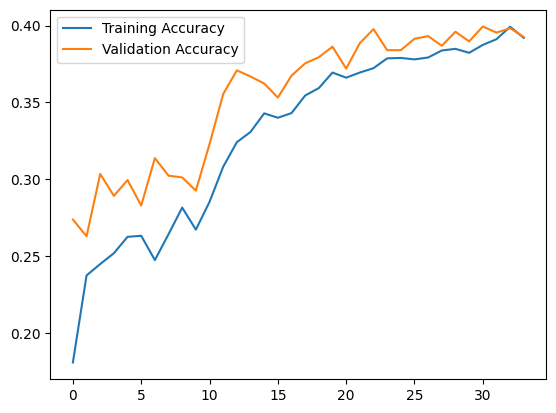

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


sb.lineplot(x=range(len(acc)), y=acc, label='Training Accuracy')
sb.lineplot(x=range(len(val_acc)), y=val_acc, label='Validation Accuracy')

<AxesSubplot:>

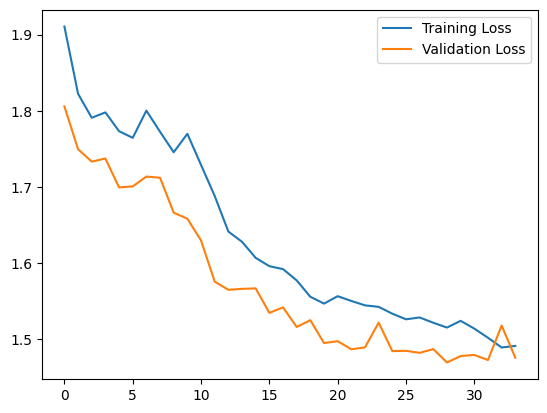

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

sb.lineplot(x=range(len(loss)), y=loss, label='Training Loss')
sb.lineplot(x=range(len(val_loss)), y=val_loss, label='Validation Loss')

### Testing

In [82]:
saved_model = load_model('./mfcc_lstm.h5')
train_loss, train_acc = saved_model.evaluate(x_train, y_train, verbose=1)
test_loss, test_acc = saved_model.evaluate(x_test, y_test, verbose=1)

55/55 [==============================] - 3s 47ms/step - loss: 1.4687 - accuracy: 0.4006


Text(0.5, 1.0, 'Training and Testing Accuracy')

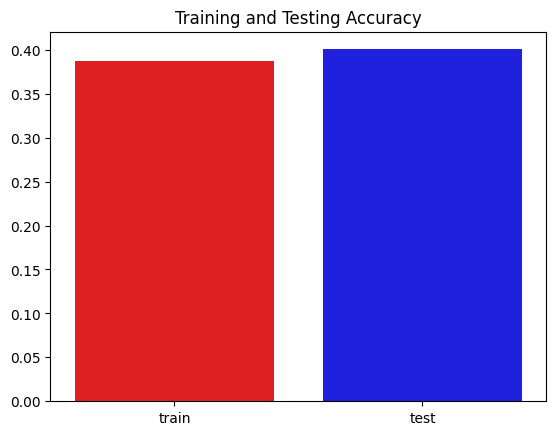

In [83]:
sb.barplot(x=['train', 'test'], y=[train_acc, test_acc], palette=['red', 'blue']).set_title('Training and Testing Accuracy')

Text(0.5, 1.0, 'Training and Testing Loss')

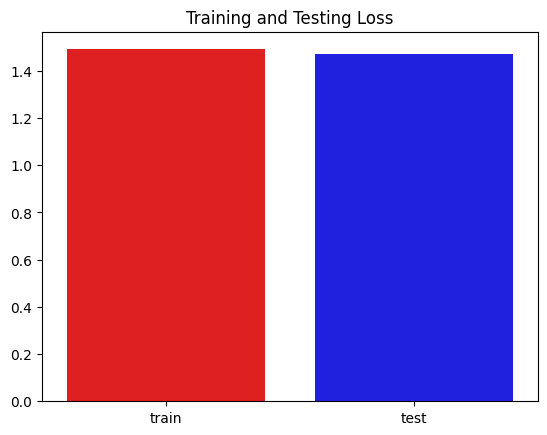

In [84]:
sb.barplot(x=['train', 'test'], y=[train_loss, test_loss], palette=['red', 'blue']).set_title('Training and Testing Loss')

In [85]:
pred_test = saved_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_i = encoder.inverse_transform(y_test)

55/55 [==============================] - 3s 44ms/step


In [86]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_i.flatten()

df.head(10)

Predicted Labels Actual Labels
0          neutral           sad
1         surprise      surprise
2            angry       disgust
3            happy         happy
4            angry         angry
5            happy           sad
6            angry         angry
7            happy         happy
8            happy       disgust
9            angry         angry

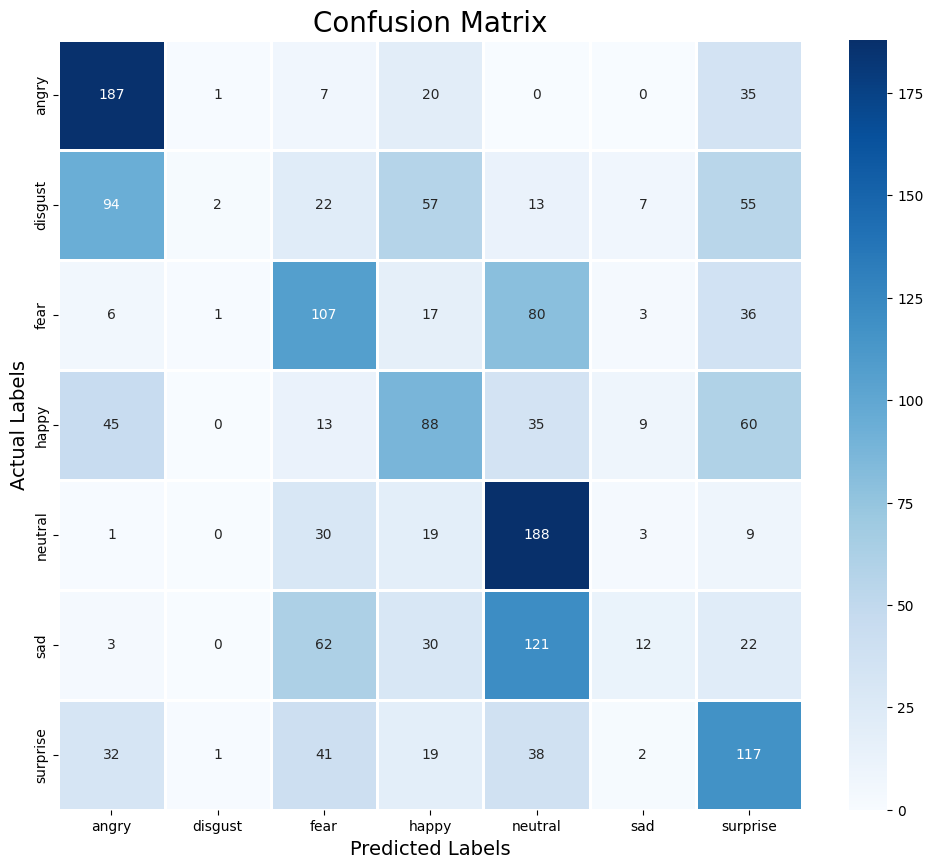

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_i, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sb.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

#### KFOLD

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
skf.get_n_splits(d['sound'], d['emotion'])

In [ ]:
lstm_acc = []
lstm_loss = []

def training(x_train, y_train, x_test, y_test, x_val, y_val):
    model = gpu_lstm()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    # mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/mfcc_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])
    a, b = model.evaluate(x_test, y_test)
    lstm_acc.append(b)
    lstm_loss.append(a)


In [ ]:
# for train_index, test_index in skf.split(d['sound'], d['emotion']):
#     x_train, x_test = d['sound'][train_index], d['sound'][test_index]
#     y_train, y_test = d['emotion'][train_index], d['emotion'][test_index]
#     x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2, random_state=0, shuffle=True)


#     x_train, y_train = augment(x_train, y_train, 'train')
#     x_test, y_test = augment(x_test, y_test, 'test')
#     x_val, y_val = augment(x_val, y_val, 'val')

#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_train)
#     x_test = scaler.transform(x_test)
#     x_val = scaler.transform(x_val)

#     y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
#     y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()
#     y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()

#     x_train = np.expand_dims(x_train, axis=2)
#     x_test = np.expand_dims(x_test, axis=2)
#     x_val = np.expand_dims(x_val, axis=2)

#     training(x_train, y_train, x_test, y_test, x_val, y_val)


In [ ]:
# lstm_acc

In [ ]:
# lstm_loss

In [ ]:
# np.average(lstm_acc)

In [ ]:
# np.average(lstm_loss)

# CNN

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('./mfcc_cnn.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [9]:
def subesco():
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=(3,3), stides=(2,2), input_shape=(x_train.shape[1:3]), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same'))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same'))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
    
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(units=512, return_sequences=True)))
    model.add(Dropout(0.25))
    model.add(Dense(units=7, activation='softmax'))

    return model



def cnn1():
    model = Sequential()
    model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1],1)))  # No. of Columns
    model.add(Activation('relu'))
    model.add(Conv1D(256, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(y_train.shape[1])) # Number of emotions
    model.add(Activation('softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

def cnn2():
    model=Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=y_train.shape[1], activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model





In [10]:
modelCnn = subesco()

modelCnn.summary()

NameError: name 'x_train' is not defined

In [ ]:
history2 = modelCnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

sb.lineplot(x=range(len(acc)), y=acc, label='Training Accuracy')
sb.lineplot(x=range(len(val_acc)), y=val_acc, label='Validation Accuracy')

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

sb.lineplot(x=range(len(loss)), y=loss, label='Training Loss')
sb.lineplot(x=range(len(val_loss)), y=val_loss, label='Validation Loss')

In [ ]:
saved_model = load_model('./mfcc_cnn.h5')
train_loss, train_acc = saved_model.evaluate(x_train, y_train, verbose=1)
test_loss, test_acc = saved_model.evaluate(x_test, y_test, verbose=1)
sb.barplot(x=['train', 'test'], y=[train_acc, test_acc], palette=['red', 'blue']).set_title('Training and Testing Accuracy')

In [ ]:
pred_test = saved_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_i = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_i.flatten()

df.head(10)

In [ ]:
cm = confusion_matrix(y_test_i, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sb.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

#### KFOLD

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
skf.get_n_splits(d['sound'], d['emotion'])

In [ ]:
cnn_acc = []
cnn_loss = []

def training(x_train, y_train, x_test, y_test, x_val, y_val):
    model = cnn2()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    # mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/mfcc_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])
    a, b = model.evaluate(x_test, y_test)
    cnn_acc.append(b)
    cnn_loss.append(a)


In [ ]:
for train_index, test_index in skf.split(d['sound'], d['emotion']):
    x_train, x_test = d['sound'][train_index], d['sound'][test_index]
    y_train, y_test = d['emotion'][train_index], d['emotion'][test_index]
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2, random_state=0, shuffle=True)


    x_train, y_train = augment(x_train, y_train, 'train')
    x_test, y_test = augment(x_test, y_test, 'test')
    x_val, y_val = augment(x_val, y_val, 'val')

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    x_val = scaler.transform(x_val)

    y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
    y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()
    y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()

    x_train = np.expand_dims(x_train, axis=2)
    x_test = np.expand_dims(x_test, axis=2)
    x_val = np.expand_dims(x_val, axis=2)

    training(x_train, y_train, x_test, y_test, x_val, y_val)


In [ ]:
cnn_acc

In [ ]:
cnn_loss

In [ ]:
np.average(cnn_acc)

In [ ]:
np.average(cnn_loss)